In [1]:
import pandas as pd

df = pd.read_csv('../data/home_prices.csv')
df.head()

,area_sqr_ft,bedrooms,color,price_lakhs
0,3774,2,Red,216
1,1460,3,Gray,88
2,1894,4,Gray,147
3,1730,2,Blue,84
4,1695,1,Blue,77


In [2]:
df['color'].unique()

array(['Red', 'Gray', 'Blue', 'Yellow', 'Green', 'White'], dtype=object)

In [3]:
df.corr()

ValueError: could not convert string to float: 'Red'

error because we have the text col 'color'

In [5]:
df_encode = pd.get_dummies(df,columns=['color'],drop_first=True,dtype=int)
df_encode.head()

,area_sqr_ft,bedrooms,price_lakhs,color_Gray,color_Green,color_Red,color_White,color_Yellow
0,3774,2,216,0,0,1,0,0
1,1460,3,88,1,0,0,0,0
2,1894,4,147,1,0,0,0,0
3,1730,2,84,0,0,0,0,0
4,1695,1,77,0,0,0,0,0


<Axes: >

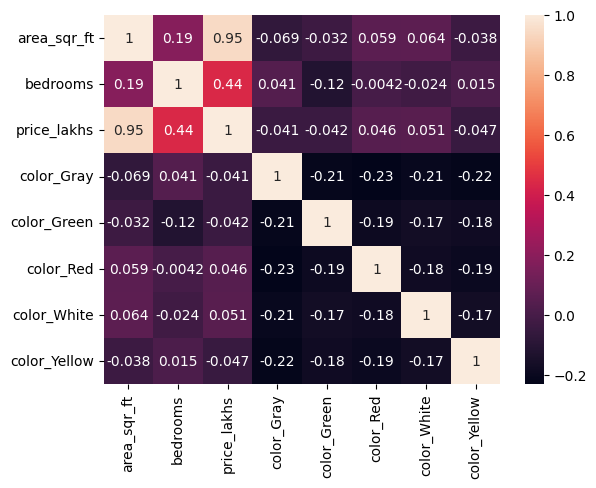

In [7]:
corr = df_encode.corr()

import seaborn as sns

sns.heatmap(corr,annot=True)

In [8]:
corr['price_lakhs']

area_sqr_ft     0.945365
bedrooms        0.439445
price_lakhs     1.000000
color_Gray     -0.040565
color_Green    -0.041959
color_Red       0.045803
color_White     0.051122
color_Yellow   -0.046673
Name: price_lakhs, dtype: float64

In [9]:
corr_price = abs(corr['price_lakhs'])
corr_price

area_sqr_ft     0.945365
bedrooms        0.439445
price_lakhs     1.000000
color_Gray      0.040565
color_Green     0.041959
color_Red       0.045803
color_White     0.051122
color_Yellow    0.046673
Name: price_lakhs, dtype: float64

In [ ]:
selected_features = corr_price[corr_price > 0.2].index.drop('price_lakhs') # Here we put a threshold where id the correlation is more then 0.2 then those feature are importent
selected_features

Index(['area_sqr_ft', 'bedrooms'], dtype='object')

here .index will provide the cols name

In [14]:
x = df[selected_features]
y = df['area_sqr_ft']

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [21]:
model_params = {
    'LinearRegression':{
        'model':LinearRegression(),
        'params':{
            'n_jobs':[1,5,10,15]
        }
    },
    'DecisionTreeRegressor':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'max_depth':[1,5,10,15],
        }
    }
}

score = []

for key,val in model_params.items():
    rg = GridSearchCV(
        val['model'],
        val['params'],
        cv=5,
        return_train_score=False
    )
    rg.fit(x_train,y_train)
    score.append({
        'model':key,
        'best_params':rg.best_params_,
        'best_score':round(rg.best_score_*100,2)
    })

pd.DataFrame(score)

,model,best_params,best_score
0,LinearRegression,{'n_jobs': 1},100.00
1,DecisionTreeRegressor,"{'criterion': 'poisson', 'max_depth': 10}",99.97
